I was curious about how working from home has been for everyone, so I created and shared a survey and received 71 responses! 

Now it's time to do some #datascience. Let's start by loading up the data from the survey.

In [59]:
import pandas as pd 			  		 			 	 	 		 		 	  		   	  			  	
pd.options.display.max_rows = 30

wfh_data = pd.read_csv("wfh.csv");

Let's first take a look at the data, just to see what we're working with. Looks like some answers stored as strings, some as percents, and some as a scale of 1-5.

In [60]:
wfh_data.head()

,Timestamp,"Where do you live? (City, State)",How old are you?,What is your gender?,How many years experience do you have?,How many adults are living at home with you?,How many kids are living at home with you?,Do you have an isolated workspace at home?,Have you worked from home previously?,"If yes, how long have you worked from home previously?","Prior to the outbreak of COVID-19, what % were you working from home?",What % are you working from home now?,"If the outbreak of COVID-19 subsided in the near future, what % of WFH would you prefer to do going forward?","On a scale of 1 to 5, PRIOR to the outbreak of COVID-19, I was productive working from home.","On a scale of 1 to 5, at the START of the outbreak of COVID-19, I was productive working from home.","On a scale of 1 to 5, in the last month, I was productive working from home.","On a scale of 1 to 5, PRIOR to the outbreak of COVID-19, I enjoyed working from home.","On a scale of 1 to 5, at the START of the outbreak of COVID-19, I enjoyed working from home.","On a scale of 1 to 5, in the last month, I enjoyed working from home.","On a scale of 1 to 5, 5 being very optimistic, 1 being very pessimistic, how do you feel about your plan to return to normal?","On a scale of 1 to 5, 5 being very optimistic, 1 being very pessimistic, how do you feel about your employer's plan to return to normal?",Please share how your experience has been working from home. Any pros/cons that you would like to call out?
0,6/15/2020 13:12:36,"Pinckney, MI",40-50,Male,20-25 years,1,2,Yes,Yes,5-10 years,100%,100%,100%,5,5,5,5,5,5,3,3,"Things will change...less people in offices, l..."
1,6/15/2020 13:13:13,"Chicago, IL",30-40,Male,15-20 years,2,4,Yes,Yes,1-5 years,30%,30%,30%,5,5,5,5,5,5,5,3,It’s a lot of fun if you have the right equipm...
2,6/15/2020 13:15:04,St louis mo,40-50,Male,15-20 years,2,1,Yes,Yes,5-10 years,50%,100%,100%,5,5,5,5,5,5,3,3,Wfh is most productive way to work
3,6/15/2020 13:20:27,"St. Louis, MO",30-40,Male,10-15 years,1,1,No,Yes,5-10 years,70%,100%,80%,5,5,5,5,5,5,4,4,Fully remote meetings (everyone is virtual) ar...
4,6/15/2020 13:21:41,IL,30-40,Male,10-15 years,2,1,Yes,No,NaN,0%,100%,80%,4,4,5,5,5,5,1,4,"even if you are great at WFH, the rest of your..."


The column names are the actual questions themselves, this won't be fun to work with. During feature engineering I'll be referencing the column names.

In [61]:
wfh_data.columns

Index(['Timestamp', 'Where do you live? (City, State)', 'How old are you?',
       'What is your gender?', 'How many years experience do you have?',
       'How many adults are living at home with you?',
       'How many kids are living at home with you?',
       'Do you have an isolated workspace at home?',
       'Have you worked from home previously?',
       'If yes, how long have you worked from home previously?',
       'Prior to the outbreak of COVID-19, what % were you working from home?',
       'What % are you working from home now?',
       'If the outbreak of COVID-19 subsided in the near future, what % of WFH would you prefer to do going forward?',
       'On a scale of 1 to 5, PRIOR to the outbreak of COVID-19, I was productive working from home.',
       'On a scale of 1 to 5, at the START of the outbreak of COVID-19, I was productive working from home.',
       'On a scale of 1 to 5, in the last month, I was productive working from home.',
       'On a scale of 1 to 5, 

What I'll do instead is pop in a new list of column names. Something easier to work with, and that still represents the column's data.

In [62]:
new_column_names = ['TIMESTAMP', 'CITY_STATE', 'AGE',
       'GENDER', 'YEARS_OF_EXPERIENCE',
       'ADULTS_AT_HOME',
       'KIDS_AT_HOME',
       'HAVE_ISOLATED_WORKSPACE',
       'PREVIOUSLY_WORKED_FROM_HOME',
       'PREVIOUSLY_WORKED_FROM_HOME_YEARS',
       'WFH_PERCENT_PRE_COVID',
       'WFH_PERCENT_CURRENT',
       'WFH_PERCENT_FUTURE_PREFERENCE',
       'PRODUCTIVITY_PRE_COVID',
       'PRODUCTIVITY_COVID_START',
       'PRODUCTIVITY_LAST_MONTH',
       'ENJOYED_WFH_PRE_COVID',
       'ENJOYED_WFH_COVID_START',
       'ENJOYED_WFH_LAST_MONTH',
       'RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF',
       'RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER',
       'FREE_FORM_COMMENTS']

wfh_data.columns = new_column_names

I'm gonna drop the Timestamp, City/state, and the freeform comments. The time they answered this question isn't relevant. There's 90% IL folks answering, so no insights can come from location, and the freeform comments is for another day, whenever I manage to learn natural language processing.

In [63]:
wfh = wfh_data.drop(columns=['TIMESTAMP', 'CITY_STATE','FREE_FORM_COMMENTS'])

Taking a look at the types of data, and keeping in mind that I have very limited number of responses, I think engineering the datatypes to be more yes/no questions would help with insights.

In [64]:
wfh.dtypes

AGE                                        object
GENDER                                     object
YEARS_OF_EXPERIENCE                        object
ADULTS_AT_HOME                              int64
KIDS_AT_HOME                                int64
HAVE_ISOLATED_WORKSPACE                    object
PREVIOUSLY_WORKED_FROM_HOME                object
PREVIOUSLY_WORKED_FROM_HOME_YEARS          object
WFH_PERCENT_PRE_COVID                      object
WFH_PERCENT_CURRENT                        object
WFH_PERCENT_FUTURE_PREFERENCE              object
PRODUCTIVITY_PRE_COVID                      int64
PRODUCTIVITY_COVID_START                    int64
PRODUCTIVITY_LAST_MONTH                     int64
ENJOYED_WFH_PRE_COVID                       int64
ENJOYED_WFH_COVID_START                     int64
ENJOYED_WFH_LAST_MONTH                      int64
RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF         int64
RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER     int64
dtype: object

**Begin Feature Engineering:**

Let's make Age a number.

In [65]:
wfh['AGE']

0     40-50
1     30-40
2     40-50
3     30-40
4     30-40
      ...  
66    20-30
67    30-40
68    30-40
69    30-40
70    30-40
Name: AGE, Length: 71, dtype: object

In [66]:
wfh['AGE'] = pd.to_numeric(wfh['AGE'].str[:2])

Let's make Gender a true/false question. ("Are you a Male or not?")

In [67]:
wfh['MALE'] = wfh['GENDER'] == 'Male'
wfh = wfh.drop(columns=['GENDER'])

Let's make years of experience a number instead of a string.

In [68]:
yoe = wfh['YEARS_OF_EXPERIENCE'].str.split("-", n = 1, expand = True)
wfh['YEARS_OF_EXPERIENCE'] = yoe[0]
yoe = wfh['YEARS_OF_EXPERIENCE'].str.split("+", n = 1, expand = True)
wfh['YEARS_OF_EXPERIENCE'] = pd.to_numeric(yoe[0], downcast='integer')
wfh['YEARS_OF_EXPERIENCE']

0     20
1     15
2     15
3     10
4     10
      ..
66     5
67    15
68    15
69    10
70    15
Name: YEARS_OF_EXPERIENCE, Length: 71, dtype: int8

Let's make 'Do you have an isolated workspace' a true/false question.

In [69]:
wfh['HAVE_ISOLATED_WORKSPACE']

0     Yes
1     Yes
2     Yes
3      No
4     Yes
     ... 
66    Yes
67    Yes
68     No
69    Yes
70     No
Name: HAVE_ISOLATED_WORKSPACE, Length: 71, dtype: object

In [70]:
wfh['HAVE_ISOLATED_WORKSPACE'] = wfh['HAVE_ISOLATED_WORKSPACE'] == 'Yes'

In [71]:
wfh['HAVE_ISOLATED_WORKSPACE']

0      True
1      True
2      True
3     False
4      True
      ...  
66     True
67     True
68    False
69     True
70    False
Name: HAVE_ISOLATED_WORKSPACE, Length: 71, dtype: bool

Repeat for previously worked from home.

In [72]:
wfh['PREVIOUSLY_WORKED_FROM_HOME']

0     Yes
1     Yes
2     Yes
3     Yes
4      No
     ... 
66    Yes
67    Yes
68     No
69    Yes
70     No
Name: PREVIOUSLY_WORKED_FROM_HOME, Length: 71, dtype: object

In [73]:
wfh['PREVIOUSLY_WORKED_FROM_HOME'] = wfh['PREVIOUSLY_WORKED_FROM_HOME'] == 'Yes'

In [74]:
wfh['PREVIOUSLY_WORKED_FROM_HOME']

0      True
1      True
2      True
3      True
4     False
      ...  
66     True
67     True
68    False
69     True
70    False
Name: PREVIOUSLY_WORKED_FROM_HOME, Length: 71, dtype: bool

In [75]:
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS']

0     5-10 years
1      1-5 years
2     5-10 years
3     5-10 years
4            NaN
         ...    
66     1-5 years
67    5-10 years
68           NaN
69     1-5 years
70           NaN
Name: PREVIOUSLY_WORKED_FROM_HOME_YEARS, Length: 71, dtype: object

Make the years worked from home a number as well.

In [76]:
wfh_yoe = wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'].str.split("-", n = 1, expand = True)
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'] = wfh_yoe[0]
wfh_yoe = wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'].str.split("+", n = 1, expand = True)
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'] = pd.to_numeric(wfh_yoe[0], downcast='integer')
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS']

0     5.0
1     1.0
2     5.0
3     5.0
4     NaN
     ... 
66    1.0
67    5.0
68    NaN
69    1.0
70    NaN
Name: PREVIOUSLY_WORKED_FROM_HOME_YEARS, Length: 71, dtype: float64

In [77]:
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'].fillna(0, inplace = True)

In [78]:
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS']

0     5.0
1     1.0
2     5.0
3     5.0
4     0.0
     ... 
66    1.0
67    5.0
68    0.0
69    1.0
70    0.0
Name: PREVIOUSLY_WORKED_FROM_HOME_YEARS, Length: 71, dtype: float64

In [79]:
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'] = pd.to_numeric(wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'], downcast='integer')

In [80]:
wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS']

0     5
1     1
2     5
3     5
4     0
     ..
66    1
67    5
68    0
69    1
70    0
Name: PREVIOUSLY_WORKED_FROM_HOME_YEARS, Length: 71, dtype: int8

Few more to go!

In [81]:
wfh.dtypes

AGE                                         int64
YEARS_OF_EXPERIENCE                          int8
ADULTS_AT_HOME                              int64
KIDS_AT_HOME                                int64
HAVE_ISOLATED_WORKSPACE                      bool
PREVIOUSLY_WORKED_FROM_HOME                  bool
PREVIOUSLY_WORKED_FROM_HOME_YEARS            int8
WFH_PERCENT_PRE_COVID                      object
WFH_PERCENT_CURRENT                        object
WFH_PERCENT_FUTURE_PREFERENCE              object
PRODUCTIVITY_PRE_COVID                      int64
PRODUCTIVITY_COVID_START                    int64
PRODUCTIVITY_LAST_MONTH                     int64
ENJOYED_WFH_PRE_COVID                       int64
ENJOYED_WFH_COVID_START                     int64
ENJOYED_WFH_LAST_MONTH                      int64
RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF         int64
RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER     int64
MALE                                         bool
dtype: object

Switching percents (that are technically strings) to numbers.

In [82]:
wfh['WFH_PERCENT_PRE_COVID']

0     100%
1      30%
2      50%
3      70%
4       0%
      ... 
66     10%
67     60%
68      0%
69     10%
70     10%
Name: WFH_PERCENT_PRE_COVID, Length: 71, dtype: object

In [83]:
wfh_percent = wfh['WFH_PERCENT_PRE_COVID'].str.split("%", n = 1, expand = True)
wfh['WFH_PERCENT_PRE_COVID'] = pd.to_numeric(wfh_percent[0], downcast='integer')

In [84]:
wfh['WFH_PERCENT_PRE_COVID']

0     100
1      30
2      50
3      70
4       0
     ... 
66     10
67     60
68      0
69     10
70     10
Name: WFH_PERCENT_PRE_COVID, Length: 71, dtype: int8

In [85]:
wfh['WFH_PERCENT_PRE_COVID'].fillna(0, inplace = True)

In [86]:
wfh['WFH_PERCENT_PRE_COVID'] = pd.to_numeric(wfh['WFH_PERCENT_PRE_COVID'], downcast='integer')

In [87]:
wfh['WFH_PERCENT_PRE_COVID']

0     100
1      30
2      50
3      70
4       0
     ... 
66     10
67     60
68      0
69     10
70     10
Name: WFH_PERCENT_PRE_COVID, Length: 71, dtype: int8

In [88]:
wfh_percent = wfh['WFH_PERCENT_CURRENT'].str.split("%", n = 1, expand = True)
wfh['WFH_PERCENT_CURRENT'] = pd.to_numeric(wfh_percent[0], downcast='integer')
wfh['WFH_PERCENT_CURRENT'].fillna(0, inplace = True)
wfh['WFH_PERCENT_CURRENT'] = pd.to_numeric(wfh['WFH_PERCENT_CURRENT'], downcast='integer')

In [89]:
wfh_percent = wfh['WFH_PERCENT_FUTURE_PREFERENCE'].str.split("%", n = 1, expand = True)
wfh['WFH_PERCENT_FUTURE_PREFERENCE'] = pd.to_numeric(wfh_percent[0], downcast='integer')
wfh['WFH_PERCENT_FUTURE_PREFERENCE'].fillna(0, inplace = True)
wfh['WFH_PERCENT_FUTURE_PREFERENCE'] = pd.to_numeric(wfh['WFH_PERCENT_FUTURE_PREFERENCE'], downcast='integer')

In [90]:
wfh.dtypes

AGE                                        int64
YEARS_OF_EXPERIENCE                         int8
ADULTS_AT_HOME                             int64
KIDS_AT_HOME                               int64
HAVE_ISOLATED_WORKSPACE                     bool
PREVIOUSLY_WORKED_FROM_HOME                 bool
PREVIOUSLY_WORKED_FROM_HOME_YEARS           int8
WFH_PERCENT_PRE_COVID                       int8
WFH_PERCENT_CURRENT                         int8
WFH_PERCENT_FUTURE_PREFERENCE               int8
PRODUCTIVITY_PRE_COVID                     int64
PRODUCTIVITY_COVID_START                   int64
PRODUCTIVITY_LAST_MONTH                    int64
ENJOYED_WFH_PRE_COVID                      int64
ENJOYED_WFH_COVID_START                    int64
ENJOYED_WFH_LAST_MONTH                     int64
RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF        int64
RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER    int64
MALE                                        bool
dtype: object

In [91]:
wfh

,AGE,YEARS_OF_EXPERIENCE,ADULTS_AT_HOME,KIDS_AT_HOME,HAVE_ISOLATED_WORKSPACE,PREVIOUSLY_WORKED_FROM_HOME,PREVIOUSLY_WORKED_FROM_HOME_YEARS,WFH_PERCENT_PRE_COVID,WFH_PERCENT_CURRENT,WFH_PERCENT_FUTURE_PREFERENCE,PRODUCTIVITY_PRE_COVID,PRODUCTIVITY_COVID_START,PRODUCTIVITY_LAST_MONTH,ENJOYED_WFH_PRE_COVID,ENJOYED_WFH_COVID_START,ENJOYED_WFH_LAST_MONTH,RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF,RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER,MALE
0,40,20,1,2,True,True,5,100,100,100,5,5,5,5,5,5,3,3,True
1,30,15,2,4,True,True,1,30,30,30,5,5,5,5,5,5,5,3,True
2,40,15,2,1,True,True,5,50,100,100,5,5,5,5,5,5,3,3,True
3,30,10,1,1,False,True,5,70,100,80,5,5,5,5,5,5,4,4,True
4,30,10,2,1,True,False,0,0,100,80,4,4,5,5,5,5,1,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,20,5,1,0,True,True,1,10,100,50,4,3,4,4,4,4,3,4,True
67,30,15,2,0,True,True,5,60,100,100,5,5,5,5,5,5,4,4,True
68,30,15,1,2,False,False,0,0,20,0,1,1,1,1,1,1,4,4,True
69,30,10,0,0,True,True,1,10,100,80,5,5,5,5,5,5,3,4,False


Ok let's take a look at the spread of the answers, and see if we can't split some of the numbered answers into more true/false as well.

In [92]:
for col in wfh.columns:
  print(col,wfh[col].value_counts())

AGE 30    31
40    23
20    10
50     7
Name: AGE, dtype: int64
YEARS_OF_EXPERIENCE 10    18
15    16
20    14
1      9
25     8
5      6
Name: YEARS_OF_EXPERIENCE, dtype: int64
ADULTS_AT_HOME 1    37
2    24
0     5
3     4
4     1
Name: ADULTS_AT_HOME, dtype: int64
KIDS_AT_HOME 0    23
2    19
1    18
3     7
5     2
4     2
Name: KIDS_AT_HOME, dtype: int64
HAVE_ISOLATED_WORKSPACE True     52
False    19
Name: HAVE_ISOLATED_WORKSPACE, dtype: int64
PREVIOUSLY_WORKED_FROM_HOME True     50
False    21
Name: PREVIOUSLY_WORKED_FROM_HOME, dtype: int64
PREVIOUSLY_WORKED_FROM_HOME_YEARS 1     31
0     22
5     13
10     5
Name: PREVIOUSLY_WORKED_FROM_HOME_YEARS, dtype: int64
WFH_PERCENT_PRE_COVID 10     20
0      16
20     11
40      6
100     4
60      4
30      4
50      3
90      2
70      1
Name: WFH_PERCENT_PRE_COVID, dtype: int64
WFH_PERCENT_CURRENT 100    66
90      3
30      1
20      1
Name: WFH_PERCENT_CURRENT, dtype: int64
WFH_PERCENT_FUTURE_PREFERENCE 100    14
50     14
80     1

A lot going on in this block. I'm changing the number of kids to more columns. Do you have 1 kid at home, do you have 2, do you have more than 2, do you have none.

For answers on a 1-5 scale, I'm taking 4s and 5s as 'True', and the rest as false.

For WFH %, splitting by 50%.

For Years, splitting by 5 and 10 years.

In [93]:
wfh['2_PLUS_ADULTS_AT_HOME'] = wfh['ADULTS_AT_HOME'] > 2
wfh['2_PLUS_KIDS_AT_HOME'] = wfh['KIDS_AT_HOME'] > 2
wfh['2_ADULTS_AT_HOME'] = wfh['ADULTS_AT_HOME'] == 2
wfh['2_KIDS_AT_HOME'] = wfh['KIDS_AT_HOME'] == 2
wfh['1_ADULT_AT_HOME'] = wfh['ADULTS_AT_HOME'] == 1
wfh['1_KID_AT_HOME'] = wfh['KIDS_AT_HOME'] == 1
wfh['0_ADULTS_AT_HOME'] = wfh['ADULTS_AT_HOME'] == 0
wfh['0_KIDS_AT_HOME'] = wfh['KIDS_AT_HOME'] == 0
wfh['PRODUCTIVITY_PRE_COVID'] = wfh['PRODUCTIVITY_PRE_COVID'] > 3
wfh['PRODUCTIVITY_COVID_START'] = wfh['PRODUCTIVITY_COVID_START'] > 3
wfh['PRODUCTIVITY_LAST_MONTH'] = wfh['PRODUCTIVITY_LAST_MONTH'] > 3
wfh['ENJOYED_WFH_PRE_COVID'] = wfh['ENJOYED_WFH_PRE_COVID'] > 3
wfh['ENJOYED_WFH_COVID_START'] = wfh['ENJOYED_WFH_COVID_START'] > 3
wfh['ENJOYED_WFH_LAST_MONTH'] = wfh['ENJOYED_WFH_LAST_MONTH'] > 3
wfh['RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER'] = wfh['RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER'] > 3
wfh['RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF'] = wfh['RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF'] > 3
wfh['WFH_50_PERCENT_OR_GREATER_PRE_COVID'] = wfh['WFH_PERCENT_PRE_COVID'] >= 50
wfh['WFH_50_PERCENT_OR_GREATER_CURRENT'] = wfh['WFH_PERCENT_CURRENT'] >= 50
wfh['WFH_50_PERCENT_OR_GREATER_FUTURE_PREFERENCE'] = wfh['WFH_PERCENT_FUTURE_PREFERENCE'] >= 50
wfh['YEARS_OF_EXPERIENCE_10_YEARS_OR_GREATER'] = wfh['YEARS_OF_EXPERIENCE'] >= 10
wfh['PREVIOUSLY_WORKED_FROM_HOME_5_YEARS_OR_GREATER'] = wfh['PREVIOUSLY_WORKED_FROM_HOME_YEARS'] >= 5

wfh = wfh.drop(columns=['ADULTS_AT_HOME','KIDS_AT_HOME','WFH_PERCENT_PRE_COVID','WFH_PERCENT_CURRENT', 'WFH_PERCENT_FUTURE_PREFERENCE', 'YEARS_OF_EXPERIENCE', 'PREVIOUSLY_WORKED_FROM_HOME_YEARS'])
wfh = wfh.drop(columns=['WFH_50_PERCENT_OR_GREATER_CURRENT'])

This is a heatmap of univariate correlation. What % of 1 variable can be used to predict another. The closer to 1, the more 'important' that feature is.

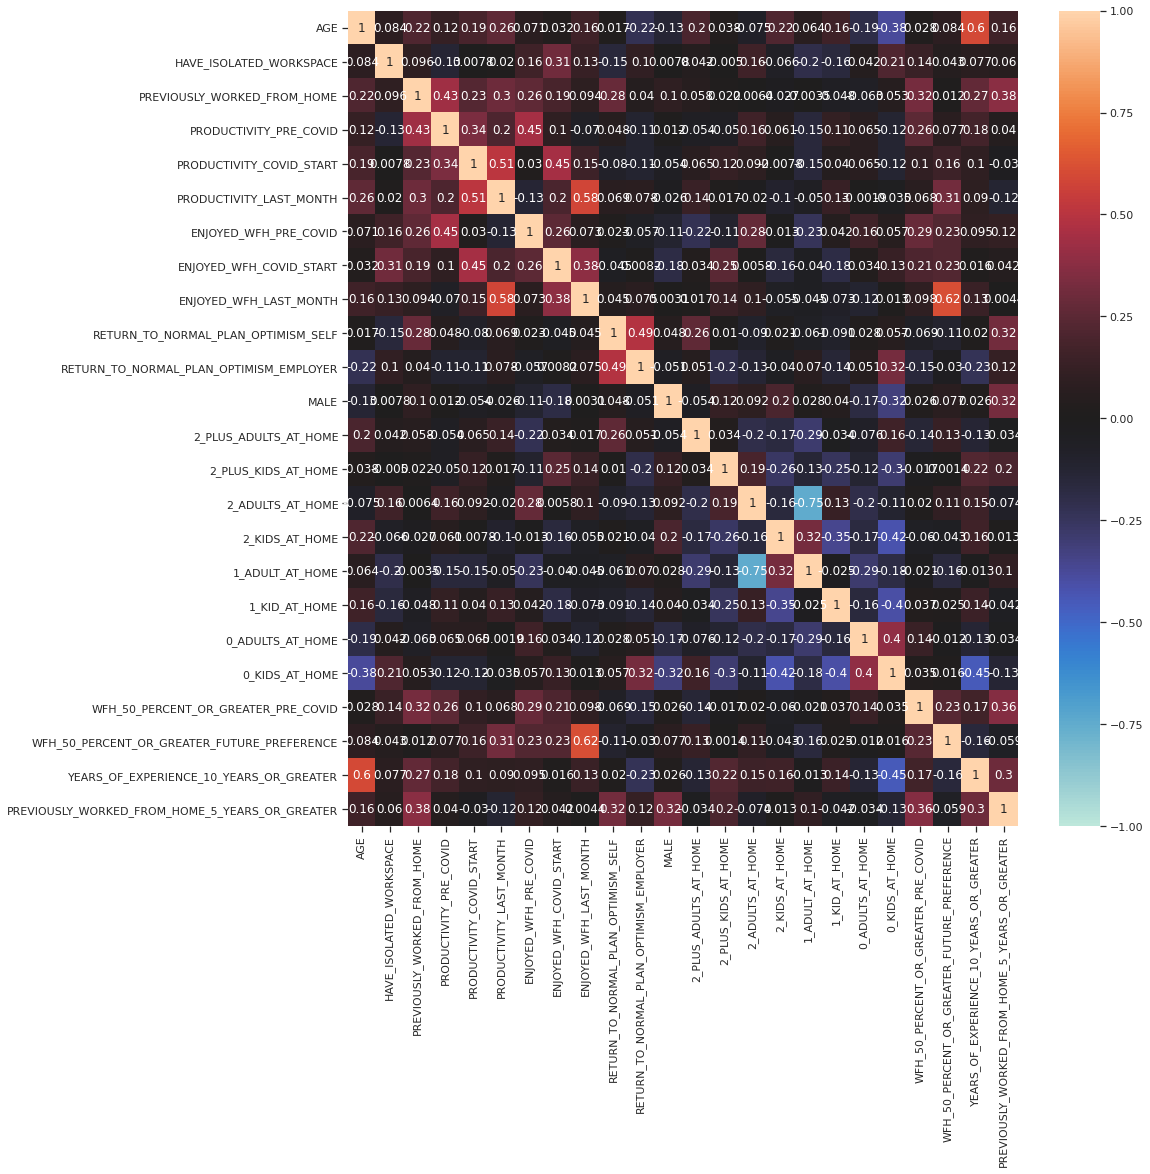

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(wfh.corr(), annot=True, ax=ax, vmin=-1, vmax=1, center= 0)

Saving the clean data for later, might import into Tablaeu.

In [95]:
wfh.to_csv('boolified.csv')

I wanted to see what features are important to whether or not you're optimistic about your employer's return to normal plan.


In [96]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = wfh.drop(columns=['RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER'])
y = wfh['RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER']

Here I ran a simple Logistic regression to try and predict y, RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER. Using all 23 columns I've got an equation here that will tell me with a 72% accuracy if you're optimistic or not. That's really good! If random is 50%, I'm 22% better than random. :fireemoji:

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.78      0.74        18
        True       0.75      0.67      0.71        18

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The dashed line here is random. The closer the blue line goes to the top left corner of this chart, the better my algorithm is.

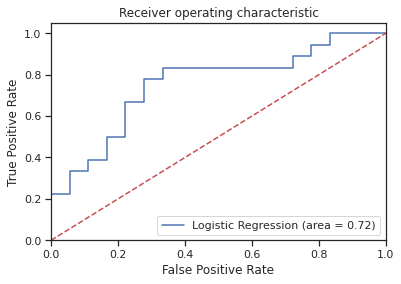

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Here, I can determine which features actually mattered to the algorithm. Closer to 0, not important. Let's see if I can't figure out a smaller subset of features that will give me the same 72% accuracy, or better.

First three columns are pretty important

*   RETURN_TO_NORMAL_PLAN_OPTIMISIM_SELF
*   0_KIDS_AT_HOME
*   HAVE_ISOLATED_WORKSPACE

..That paints a picture, doesn't it.



In [99]:
column_labels = X.columns.tolist()
coef = logreg.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":logreg.coef_[0]}).sort_values(by=['Coefficients'], ascending=False)

,Feature,Coefficients
9,RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF,1.457509
18,0_KIDS_AT_HOME,0.873659
1,HAVE_ISOLATED_WORKSPACE,0.870934
5,PRODUCTIVITY_LAST_MONTH,0.298454
6,ENJOYED_WFH_PRE_COVID,0.260499
15,1_ADULT_AT_HOME,0.223816
2,PREVIOUSLY_WORKED_FROM_HOME,0.144423
11,2_PLUS_ADULTS_AT_HOME,0.113560
13,2_ADULTS_AT_HOME,0.047703
14,2_KIDS_AT_HOME,-0.018416


Just using those three columns and I'm upto 75% accuracy. 

(For my data science folks, I'm taking note of the f1-score, but this time around the accuracy and f1-score are the same, and easier to explain!)

In [100]:
columns_to_use = ['RETURN_TO_NORMAL_PLAN_OPTIMISM_SELF','0_KIDS_AT_HOME','HAVE_ISOLATED_WORKSPACE']

X = wfh[columns_to_use]
y = wfh['RETURN_TO_NORMAL_PLAN_OPTIMISM_EMPLOYER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.78      0.76        18
        True       0.76      0.72      0.74        18

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36

